In [1]:
#seg01

from scipy import io
import pandas as pd
import ezodf

def read_ods(filename, sheet_no=0, header=0):
    tab=ezodf.opendoc(filename=filename).sheets[sheet_no]
    return pd.DataFrame({col[header].value:[x.value for x in col[header+1:]]
                        for col in tab.columns()})

In [2]:
df = read_ods(filename='/home/secl00/Documents/db1.ods')
df

In [4]:
segnum = list(set(df['SEG']))
len(segnum)

6630

### Preprocessing

In [5]:
import math
import numpy as np

def value(i):
    if i < 0.0:
        i = -10.0
    elif i > 0.0 :
        i = 10.0
    
    return i

import numpy as np

def unit_vector(vector):
    return vector / np.linalg.norm(vector)

def angle_between(v1,v2):
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

vectors_value =[]
print (np.shape(vectors_value))


(0,)


In [6]:
k=[]
for jj in range(len(segnum)):
    cropseg = df[df['SEG']==segnum[jj]] 
    newarr= np.array(cropseg)
    k.append(len(newarr))

maxnum = max(k)
print (maxnum)
# cropseg = df[df['SEG']==segnum[5]] 
# cropseg

67


In [7]:
for i in range(len(segnum)):
    
    
    cropseg = df[df['SEG']==segnum[i]] 
    newarr= np.array(cropseg)

    vec_value= np.zeros((1,maxnum))
#     print (newarr)
#     print (len(newarr))
    curr = 0
    if len(newarr)==1:
        x3 = value(newarr[0][6])
        y3 = value(newarr[0][7])
        z3 = value(newarr[0][8])    

        anglenum = angle_between((x3,y3,x3),(0,0,0))

        if (math.isnan(anglenum) is True):
            anglenum = 7

        vec_value[0,curr]= anglenum

    else:
        x3 = value(newarr[0][6])
        y3 = value(newarr[0][7])
        z3 = value(newarr[0][8])    

        anglenum = angle_between((x3,y3,x3),(0,0,0))

        if (math.isnan(anglenum) is True):
            anglenum = 7

        vec_value[0,curr]= anglenum


        for curr in range(len(newarr)-1):
            x3 = value(newarr[curr][6])
            y3 = value(newarr[curr][7])
            z3 = value(newarr[curr][8])

            x4 = value(newarr[curr+1][6])
            y4 = value(newarr[curr+1][7])
            z4 = value(newarr[curr+1][8])

            anglenum = angle_between((x3,y3,x3),(x4,y4,z4))

            if (math.isnan(anglenum) is True):
                anglenum = 7

            vec_value[0,curr+1]= anglenum

    vectors_value.append(vec_value)        
        

/opt/anaconda3/envs/seg01/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


In [8]:
print (np.shape(vectors_value))

# print (vectors_value[6629])

(6630, 1, 67)


In [9]:
vectors_value_new = np.zeros((len(vectors_value),maxnum))
                      
for kk in range(len(vectors_value)):
    vectors_value_new[kk,:]=vectors_value[kk][0]
                     

In [10]:
print (np.shape(vectors_value_new))

(6630, 67)


In [11]:
vectors_value_new.min() , vectors_value_new.max()

(0.0, 7.0)

In [14]:
test_data =vectors_value_new

# hdbscan

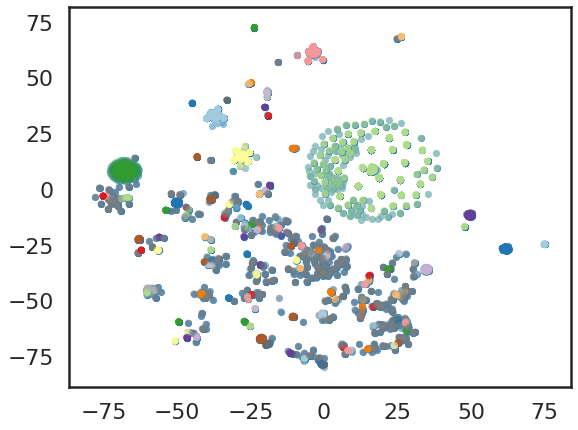

In [26]:
import umap
import hdbscan
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
# clusterable_embedding = umap.UMAP(
#     n_neighbors=30,
#     min_dist=0.0,
#     n_components=2,
#     random_state=42,
# ).fit_transform(digits.data)
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 50, 'linewidths':0}
plt.rcParams["figure.figsize"] = [9,7]

projection = TSNE().fit_transform(vectors_value_new)
plt.scatter(*projection.T, **plot_kwds)

clusterer = hdbscan.HDBSCAN(min_cluster_size=10).fit(vectors_value_new)
color_palette = sns.color_palette('Paired', 100)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

In [13]:
min(clusterer.labels_), max(clusterer.labels_)

(-1, 97)

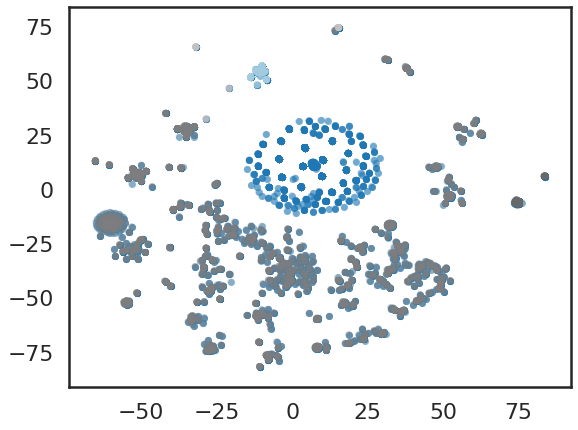

In [27]:
import umap
import hdbscan
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
# clusterable_embedding = umap.UMAP(
#     n_neighbors=30,
#     min_dist=0.0,
#     n_components=2,
#     random_state=42,
# ).fit_transform(digits.data)
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 50, 'linewidths':0}
plt.rcParams["figure.figsize"] = [9,7]

projection = TSNE().fit_transform(vectors_value_new)
plt.scatter(*projection.T, **plot_kwds)

clusterer = hdbscan.HDBSCAN(min_cluster_size=500).fit(vectors_value_new)
color_palette = sns.color_palette('Paired', 100)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

In [28]:
min(clusterer.labels_), max(clusterer.labels_)

(-1, 1)

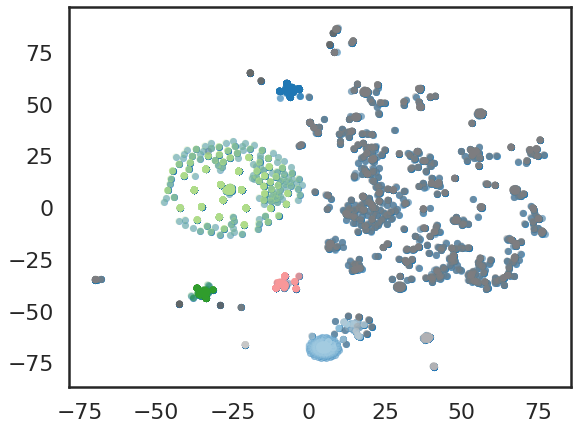

In [29]:
import umap
import hdbscan
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
# clusterable_embedding = umap.UMAP(
#     n_neighbors=30,
#     min_dist=0.0,
#     n_components=2,
#     random_state=42,
# ).fit_transform(digits.data)
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 50, 'linewidths':0}
plt.rcParams["figure.figsize"] = [9,7]

projection = TSNE().fit_transform(vectors_value_new)
plt.scatter(*projection.T, **plot_kwds)

clusterer = hdbscan.HDBSCAN(min_cluster_size=200).fit(vectors_value_new)
color_palette = sns.color_palette('Paired', 100)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

In [30]:
min(clusterer.labels_), max(clusterer.labels_)

(-1, 4)

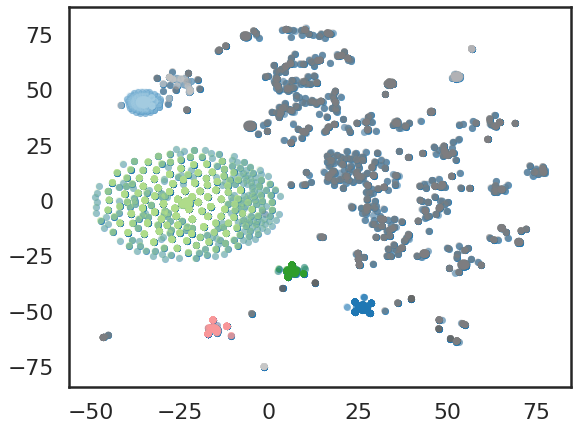

In [31]:
import umap
import hdbscan
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
# clusterable_embedding = umap.UMAP(
#     n_neighbors=30,
#     min_dist=0.0,
#     n_components=2,
#     random_state=42,
# ).fit_transform(digits.data)
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 50, 'linewidths':0}
plt.rcParams["figure.figsize"] = [9,7]

projection = TSNE().fit_transform(vectors_value_new)
plt.scatter(*projection.T, **plot_kwds)

clusterer = hdbscan.HDBSCAN(min_cluster_size=100).fit(vectors_value_new)
color_palette = sns.color_palette('Paired', 100)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

In [32]:
min(clusterer.labels_), max(clusterer.labels_)

(-1, 4)

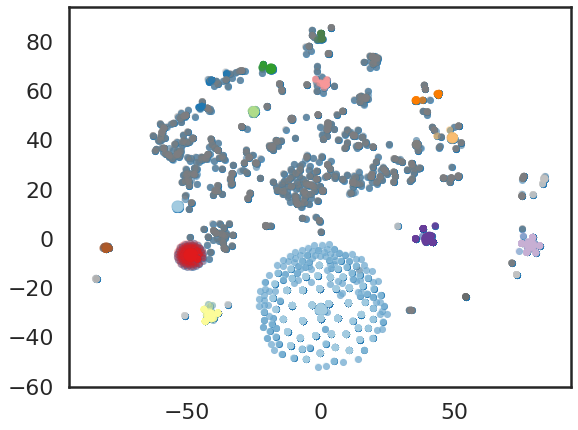

In [33]:
import umap
import hdbscan
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
# clusterable_embedding = umap.UMAP(
#     n_neighbors=30,
#     min_dist=0.0,
#     n_components=2,
#     random_state=42,
# ).fit_transform(digits.data)
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 50, 'linewidths':0}
plt.rcParams["figure.figsize"] = [9,7]

projection = TSNE().fit_transform(vectors_value_new)
plt.scatter(*projection.T, **plot_kwds)

clusterer = hdbscan.HDBSCAN(min_cluster_size=60).fit(vectors_value_new)
color_palette = sns.color_palette('Paired', 100)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

In [34]:
min(clusterer.labels_), max(clusterer.labels_)

(-1, 12)

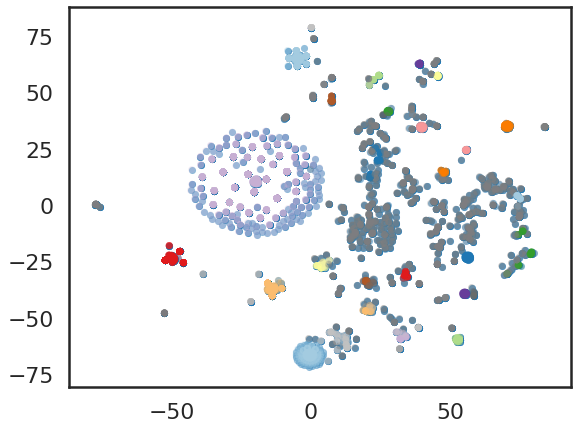

In [35]:
import umap
import hdbscan
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
# clusterable_embedding = umap.UMAP(
#     n_neighbors=30,
#     min_dist=0.0,
#     n_components=2,
#     random_state=42,
# ).fit_transform(digits.data)
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 50, 'linewidths':0}
plt.rcParams["figure.figsize"] = [9,7]

projection = TSNE().fit_transform(vectors_value_new)
plt.scatter(*projection.T, **plot_kwds)

clusterer = hdbscan.HDBSCAN(min_cluster_size=30).fit(vectors_value_new)
color_palette = sns.color_palette('Paired', 100)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

In [36]:
min(clusterer.labels_), max(clusterer.labels_)

(-1, 24)

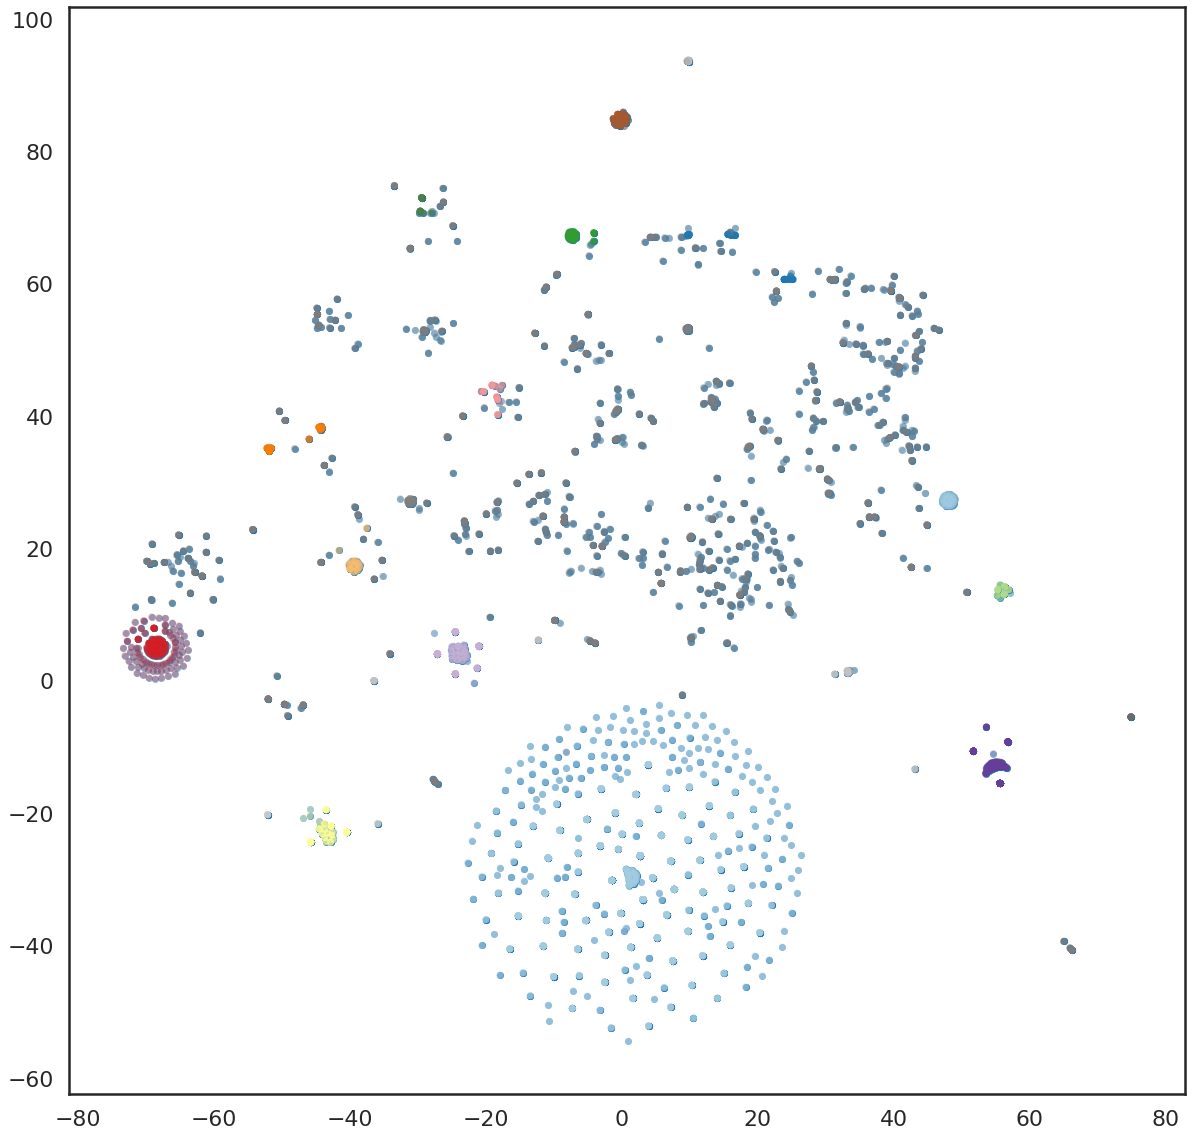

In [86]:
import umap
import hdbscan
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
# clusterable_embedding = umap.UMAP(
#     n_neighbors=30,
#     min_dist=0.0,
#     n_components=2,
#     random_state=42,
# ).fit_transform(digits.data)
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 50, 'linewidths':0}
plt.rcParams["figure.figsize"] = [20,20]

projection = TSNE().fit_transform(vectors_value_new)
plt.scatter(*projection.T, **plot_kwds)

clusterer = hdbscan.HDBSCAN(min_cluster_size=60).fit(vectors_value_new)
color_palette = sns.color_palette('Paired', 50)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

In [88]:
min(clusterer.labels_), max(clusterer.labels_)

(-1, 12)

In [89]:
f = pd.DataFrame ([segnum,clusterer.labels_])

gg = f.T
print (f.T)

           0    1
0      301.0 -1.0
1      302.0 -1.0
2      303.0 -1.0
3      304.0 -1.0
4      305.0 -1.0
...      ...  ...
6625  9995.0  9.0
6626  9996.0 -1.0
6627  9997.0 -1.0
6628  9998.0  5.0
6629  9999.0 -1.0

[6630 rows x 2 columns]


In [90]:
gg.to_excel('/home/secl00/Documents/k_60.xlsx', sheet_name='sheet1', index=False)

In [64]:

print (len(segnum), len(clusterer.labels_))

6630 6630


### TSNE = x

TypeError: text() missing 1 required positional argument: 's'

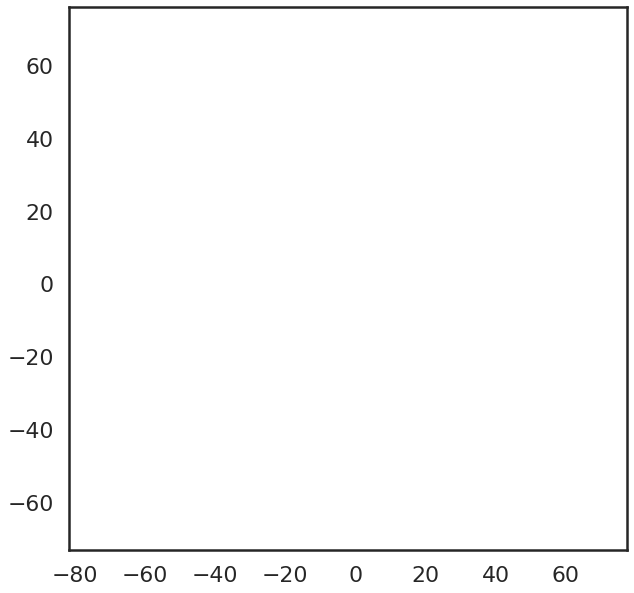

In [25]:
# coding: utf-8

from sklearn.manifold import TSNE

from sklearn.datasets import load_digits

import matplotlib.pyplot as plt



tsne = TSNE(random_state=42)


digits_tsne = tsne.fit_transform(test_data)

plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)


colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525", "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E","#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525", "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

for i in range(len(test_data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1])

plt.xlabel("tsne 1")
plt.ylabel("tsne 2")
plt.show()


### test detail

In [ ]:
cropseg = df[df['SEG']==segnum[3]]
cropseg

newarr= np.array(cropseg)
# print (np.array(cropseg))
# print (len(cropseg))

# newarr = cropseg
print (newarr[])

In [ ]:
def value (i):
    if i < 0:
        i = -10
    elif i > 0 :
        i = 10
    
    return i

import numpy as np

def unit_vector(vector):
    return vector / np.linalg.norm(vector)

def angle_between(v1,v2):
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))



newarr= np.array(cropseg)

newarr


In [ ]:
import math

maxnum = 67-1

vectors_value =[]
#    vectors_value.append(vec_value)
vec_value= np.zeros((1,maxnum))


for curr in range(len(newarr)-1):
#     x = newarr[curr][6]
#     y = newarr[curr][7]
#     z = newarr[curr][8]
    
#     x2 = newarr[curr+1][6]
#     y2 = newarr[curr+1][7]
#     z2 = newarr[curr+1][8]
    
#     print ("                       ",x,y,z,"                             ",x2,y2,z2)
#     print (angle_between((x2,y2,x2),(x,y,z)))
#     print (angle_between((x,y,z),(x2,y2,x2)))
   
    x3 = value(newarr[curr][6])
    y3 = value(newarr[curr][7])
    z3 = value(newarr[curr][8])
    
    x4 = value(newarr[curr+1][6])
    y4 = value(newarr[curr+1][7])
    z4 = value(newarr[curr+1][8])

    anglenum = angle_between((x3,y3,x3),(x4,y4,z4))
    
    if (math.isnan(anglenum) is True):
        anglenum = -1

    vec_value[0,curr]= anglenum
    
    
    
#     print (angle_between((x3,y3,x3),(x4,y4,z4)))
#     print (angle_between((x4,y4,z4),(x3,y3,x3)))

       
vectors_value.append(vec_value)


In [ ]:
print (np.shape(vectors_value))

### max 값 67

In [ ]:
maxnum = 67
vectors_value =[]
#    vectors_value.append(vec_value)
vec_value= np.zeros((1,maxnum))

print (vec_value.shape)
print (vec_value)

In [ ]:
curr = 0 
x = cropseg['DELTA_X'][curr]
y = cropseg['DELTA_Y'][curr]
z = cropseg['DELTA_Z'][curr]

print (x,y,z)

In [ ]:
x2 = cropseg['DELTA_X'][curr+1]
y2 = cropseg['DELTA_Y'][curr+1]
z2 = cropseg['DELTA_Z'][curr+1]

print (x2,y2,z2)

In [ ]:
for curr in range(len(cropseg)-1):
    x = cropseg['DELTA_X'][curr]
    y = cropseg['DELTA_Y'][curr]
    z = cropseg['DELTA_Z'][curr]
    
    x2 = cropseg['DELTA_X'][curr+1]
    y2 = cropseg['DELTA_Y'][curr+1]
    z2 = cropseg['DELTA_Z'][curr+1]
    
    print ("                       ",x,y,z,"                             ",x2,y2,z2)
    print (angle_between((x,y,z),(x2,y2,x2)))
    
    